review dataset dulu

In [277]:
# impor libray yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt

In [278]:
# baca data
data = pd.read_csv('data/IMDB-Movie-Data.csv')
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [279]:
# info mengenai data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [280]:
# hapus atribut yang tidak relevan

att_tdk_relevan = ['Rank', 'Director', 'Actors', 'Runtime (Minutes)', 'Revenue (Millions)', 'Metascore', 'Votes', 'Year', 'Rating' ]
data = data.drop(att_tdk_relevan, axis=1)
data.head()

,Title,Genre,Description
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te..."
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea..."
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...


In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1000 non-null   object
 1   Genre        1000 non-null   object
 2   Description  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


Dataset 2

In [282]:
data2 = pd.read_csv('data/imdb_top_1000.csv')

att_tdk_relevan = ['Poster_Link', 'Certificate', 'Runtime', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Released_Year', 'IMDB_Rating' ]
data2 = data2.drop(att_tdk_relevan, axis=1)

# Mengubah nama beberapa kolom sekaligus
data2.rename(columns={'Series_Title': 'Title', 'Overview': 'Description'}, inplace=True)

urutan_kolom = ['Title', 'Genre', 'Description', 'Year', 'Rating' ]
data2.reindex(columns=urutan_kolom)

data2.head()

,Title,Genre,Description
0,The Shawshank Redemption,Drama,Two imprisoned men bond over a number of years...
1,The Godfather,"Crime, Drama",An organized crime dynasty's aging patriarch t...
2,The Dark Knight,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...
3,The Godfather: Part II,"Crime, Drama",The early life and career of Vito Corleone in ...
4,12 Angry Men,"Crime, Drama",A jury holdout attempts to prevent a miscarria...


In [283]:
# Gabung data 1 dengan data 2

merged_data = pd.concat([data, data2], ignore_index=True)
# merged_data['Genre'] = merged_data['Genre'].apply(lambda x: x.split(','))

# pecah fitur genre menjadi beberapa kolom, yaitu genre1, genre2, dan genre3
merged_data[['Genre1', 'Genre2', 'Genre3']] = merged_data['Genre'].str.split(',', expand=True)
merged_data = merged_data.drop('Genre', axis=1)

# dijadikan ke file csv baru
merged_data.to_csv('data/data_film.csv', index=False)

merged_data

,Title,Description,Genre1,Genre2,Genre3
0,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,Action,Adventure,Sci-Fi
1,Prometheus,"Following clues to the origin of mankind, a te...",Adventure,Mystery,Sci-Fi
2,Split,Three girls are kidnapped by a man with a diag...,Horror,Thriller,None
3,Sing,"In a city of humanoid animals, a hustling thea...",Animation,Comedy,Family
4,Suicide Squad,A secret government agency recruits some of th...,Action,Adventure,Fantasy
...,...,...,...,...,...
1995,Breakfast at Tiffany's,A young New York socialite becomes interested ...,Comedy,Drama,Romance
1996,Giant,Sprawling epic covering the life of a Texas ca...,Drama,Western,None
1997,From Here to Eternity,"In Hawaii in 1941, a private is cruelly punish...",Drama,Romance,War
1998,Lifeboat,Several survivors of a torpedoed merchant ship...,Drama,War,None


Gabung dengan Dataset 3

In [284]:
# Gabung dengan data 3

data3 = pd.read_csv('data/trainingSet.csv')

att_tdk_relevan = ['imdbID']
data3 = data3.drop(att_tdk_relevan, axis=1)

data3.rename(columns={'Plot': 'Description'}, inplace=True)
data_final = pd.concat([merged_data, data3], ignore_index=True)

# menghapus duplikat pada kolom 'title'
data_final = data_final.drop_duplicates(subset=['Title'])

# dijadikan ke file csv baru
data_final.to_csv('data/data_film.csv', index=False)

data_final

,Title,Description,Genre1,Genre2,Genre3
0,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,Action,Adventure,Sci-Fi
1,Prometheus,"Following clues to the origin of mankind, a te...",Adventure,Mystery,Sci-Fi
2,Split,Three girls are kidnapped by a man with a diag...,Horror,Thriller,None
3,Sing,"In a city of humanoid animals, a hustling thea...",Animation,Comedy,Family
4,Suicide Squad,A secret government agency recruits some of th...,Action,Adventure,Fantasy
...,...,...,...,...,...
6450,Straight-Jacket,"In 1950's Hollywood, movie star Guy Stone must...",Comedy,Romance,NaN
6451,Miles Ahead,An exploration of the life and music of Miles ...,Biography,Drama,Music
6452,Demons,"After being robbed by a geisha, a ronin warrio...",Drama,Horror,NaN
6453,The Video Dead,An unlabelled crate from an unknown source is ...,Comedy,Horror,NaN


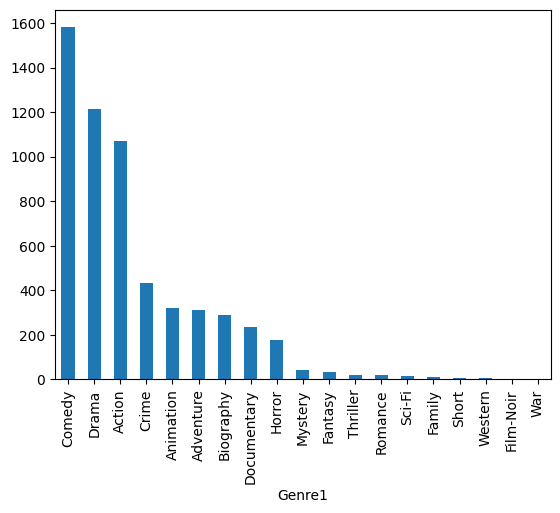

Genre1
Comedy         1581
Drama          1212
Action         1069
Crime           430
Animation       321
Adventure       311
Biography       289
Documentary     235
Horror          174
Mystery          40
Fantasy          33
Thriller         19
Romance          19
Sci-Fi           13
Family           12
Short             6
Western           5
Film-Noir         3
War               2
Name: count, dtype: int64


In [273]:
# genre terbanyak
counts = data_final.Genre1.value_counts()
counts.plot(kind='bar')
plt.show()
print (counts)

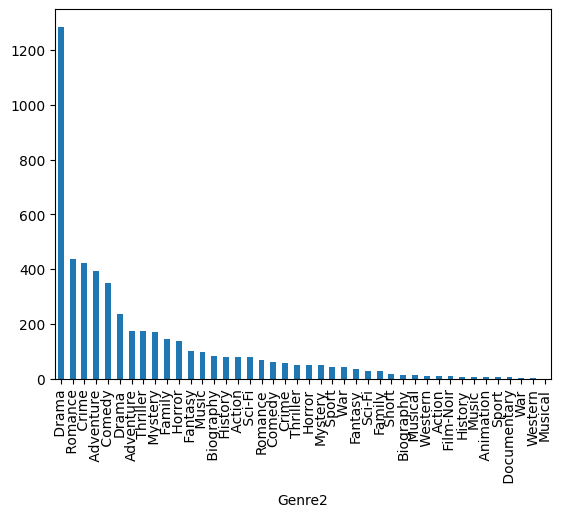

Genre2
 Drama          1284
 Romance         438
 Crime           423
 Adventure       394
 Comedy          348
Drama            237
Adventure        175
 Thriller        174
 Mystery         172
 Family          147
 Horror          139
 Fantasy         103
 Music            99
 Biography        82
 History          80
 Action           80
 Sci-Fi           79
Romance           69
Comedy            62
Crime             58
Thriller          52
Horror            49
Mystery           49
 Sport            45
 War              43
Fantasy           35
Sci-Fi            28
Family            27
 Short            19
Biography         15
 Musical          13
 Western          10
Action            10
 Film-Noir         9
History            8
Music              8
 Animation         6
Sport              5
 Documentary       5
War                4
Western            2
Musical            1
Name: count, dtype: int64


In [274]:
# lihat genre terbanyak di genre2
# counts = train.Genre2.value_counts()
counts = data_final.Genre2.value_counts()
counts.plot(kind='bar')
plt.show()
print (counts)

Preprocessing

In [2]:
# import library untuk preprocessing
import pandas as pd
import re

# preprocessing description

df = pd.read_csv('data/data_film.csv')
# df['Genre'] = df['Genre'].apply(lambda x: x.split(', '))

# Lowercase all text
df['Description'] = df['Description'].apply(lambda x: x.lower())

# Remove punctuations and special characters
df['Description'] = df['Description'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

df

,Title,Description,Genre1,Genre2,Genre3
0,Guardians of the Galaxy,a group of intergalactic criminals are forced ...,Action,Adventure,Sci-Fi
1,Prometheus,following clues to the origin of mankind a tea...,Adventure,Mystery,Sci-Fi
2,Split,three girls are kidnapped by a man with a diag...,Horror,Thriller,NaN
3,Sing,in a city of humanoid animals a hustling theat...,Animation,Comedy,Family
4,Suicide Squad,a secret government agency recruits some of th...,Action,Adventure,Fantasy
...,...,...,...,...,...
5769,Straight-Jacket,in 1950s hollywood movie star guy stone must m...,Comedy,Romance,NaN
5770,Miles Ahead,an exploration of the life and music of miles ...,Biography,Drama,Music
5771,Demons,after being robbed by a geisha a ronin warrior...,Drama,Horror,NaN
5772,The Video Dead,an unlabelled crate from an unknown source is ...,Comedy,Horror,NaN


In [3]:
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# stopword dan stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
df['Description'] = df['Description'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split() if word not in stop_words]))
df.head()

,Title,Description,Genre1,Genre2,Genre3
0,Guardians of the Galaxy,group intergalact crimin forc work togeth stop...,Action,Adventure,Sci-Fi
1,Prometheus,follow clue origin mankind team find structur ...,Adventure,Mystery,Sci-Fi
2,Split,three girl kidnap man diagnos 23 distinct pers...,Horror,Thriller,NaN
3,Sing,citi humanoid anim hustl theater impresario at...,Animation,Comedy,Family
4,Suicide Squad,secret govern agenc recruit danger incarcer su...,Action,Adventure,Fantasy


In [26]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

# transform data
tfidf = TfidfVectorizer(stop_words=None)
X = tfidf.fit_transform(df['Description'])

genre = df['Genre1'].values.reshape(-1, 1)

# one-hot encoding
encoder = OneHotEncoder()
genre = encoder.fit_transform(genre)

y = genre.toarray()
print(y)
y = np.argmax(y, axis=1)
print(y)

# print(X)
# print(o)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[ 0  1 11 ...  7  4  7]


In [35]:
data_genre = df['Genre1'].values

s1 = pd.Series(y)
s2 = pd.Series(data_genre)


genre = pd.concat([s1, s2], axis=1)
genre = genre.drop_duplicates(subset=[1])
genre = genre.rename(columns={0: 'no', 1: 'genre'})
genre = genre.sort_values('no')
print(genre.head())

att_tdk_relevan = ['Genre2', 'Genre3']
rekomen_film = df.drop(att_tdk_relevan, axis=1)
print(rekomen_film.head())

    no      genre
0    0     Action
1    1  Adventure
3    2  Animation
11   3  Biography
6    4     Comedy
                     Title                                        Description  \
0  Guardians of the Galaxy  group intergalact crimin forc work togeth stop...   
1               Prometheus  follow clue origin mankind team find structur ...   
2                    Split  three girl kidnap man diagnos 23 distinct pers...   
3                     Sing  citi humanoid anim hustl theater impresario at...   
4            Suicide Squad  secret govern agenc recruit danger incarcer su...   

      Genre1  
0     Action  
1  Adventure  
2     Horror  
3  Animation  
4     Action  


In [28]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Model SVM

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Train model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Evaluate model performance
print('Akurasi SVM =', accuracy_score(y_test, y_pred))

Akurasi SVM = 0.470995670995671


In [10]:
# Model Decision Tress

from sklearn.tree import DecisionTreeClassifier

model_dct = DecisionTreeClassifier()
model_dct.fit(X_train, y_train)

# Predict on test set
y_pred = model_dct.predict(X_test)

# Evaluate model performance
print('Akurasi Decision Tree =', accuracy_score(y_test, y_pred))

Akurasi Decision Tree = 0.3064935064935065


In [11]:
# Model Naive Bayes

from sklearn.naive_bayes import MultinomialNB

# Membuat model Naive Bayes
model_nb = MultinomialNB()

# Melatih _nb Naive Bayes
model_nb.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_nb.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes: ", accuracy)

Akurasi Naive Bayes:  0.3471861471861472


In [12]:
# Model KNN

from sklearn.neighbors import KNeighborsClassifier

# Membuat model KNN
model_knn = KNeighborsClassifier()

# Melatih model KNN
model_knn.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_knn.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: ", accuracy)

Akurasi model:  0.3619047619047619


In [9]:
# Model Random Forest

from sklearn.ensemble import RandomForestClassifier

# Membuat model Random Forest
model_rf = RandomForestClassifier()

# Melatih model Random Forest
model_rf.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_rf.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Random Forest: ", accuracy)

Akurasi model Random Forest:  0.40606060606060607


In [31]:
# Model Multi-layer Perceptron

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train,y_train)

# Memprediksi genre film pada data uji
y_pred = mlp.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi MLP:", accuracy)

Akurasi MLP: 0.44242424242424244


In [14]:
import pickle

pickle.dump(svm, open("pickle/model_svm.sav", "wb"))
# pickle.dump(model_dct, open("pickle/model_dt.sav", "wb"))
# pickle.dump(model_nb, open("pickle/model_nb.sav", "wb"))
# pickle.dump(model_knn, open("pickle/model_knn.sav", "wb"))
pickle.dump(model_rf, open("pickle/model_rf.sav", "wb"))

pickle.dump(genre, open('pickle/genre.sav', 'wb'))
pickle.dump(tfidf, open('pickle/vectorizer.sav', 'wb'))